# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [1]:
!pip install pmdarima

In [21]:
# 

import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                             


from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse




In [22]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [3]:
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


[Text(0.5, 1.0, 'California Hospitality Industry Employees'),
 Text(0.5, 0, ' '),
 Text(0, 0.5, 'Thousands of Persons')]

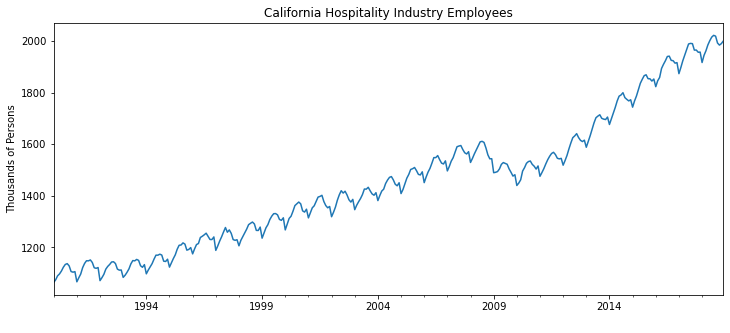

In [20]:

ax = df['Employees'].plot(figsize=(12,5))
ax.autoscale(axis='x',tight=True)
ax.set(title = 'California Hospitality Industry Employees', xlabel = ' ', ylabel = 'Thousands of Persons') 


Наблюдается явно выраженный тренд и сезонность. Излом по тренду в 2009-2010 году является следствием кризиса 2008 года.

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').

In [5]:
r = seasonal_decompose(df['Employees'],model='additive')

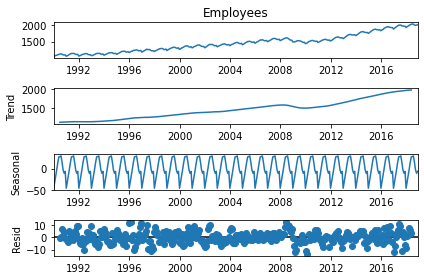

In [6]:
r.plot();

В результате очистки от остатков и сезонных колебаний видим положительный тренд.

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [23]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 690, in fit
    mlefit = super(MLEModel, self).fit(start_para

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 16 Dec 2021   AIC                           2208.504
Time:                                      11:36:59   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.530      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.474      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.150      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    705.126      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.324      0.000      -0.834      -0.664
sigma2        29.2970      1.717     17.064      0.000      25.932      32.662
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
### 4. Разделите данные на train/test 
Установите один год (12 записей) для тестирования. Есть несколько способов сделать это!

In [8]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
train.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [26]:
test.head()

,Employees
Date,
2018-01-01,1916.8
2018-02-01,1944.5
2018-03-01,1962.2
2018-04-01,1984.9
2018-05-01,2001.5


### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train

In [11]:
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Thu, 16 Dec 2021   AIC                           2128.116
Time:                                      11:18:46   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.265      0.000       0.839       1.009
ma.L1         -0.9584      0.070    -13.682      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.460      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    726.037      0.000       0.995       1.000
ma.S.L12      -0.7518      0.044    -17.154      0.000      -0.838      -0.666
sigma2        28.7659      1.684     17.079      0.000      25.465      32.067
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Thu, 16 Dec 2021   AIC                           2196.814
Time:                                    11:18:46   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [27]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(0, 1, 0)x(2, 0, 0, 12)')

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

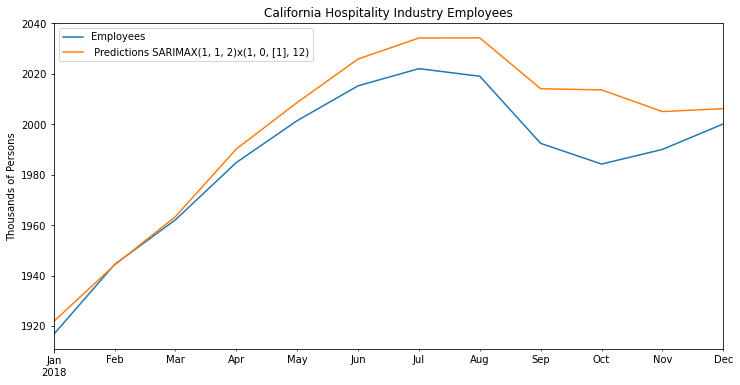

In [28]:

title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''
ax = test['Employees'].plot(legend=True, figsize=(12,6),title=title) 
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### 7. Нарисуйте графики прогнозируемых и известных значений


In [30]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = ''

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

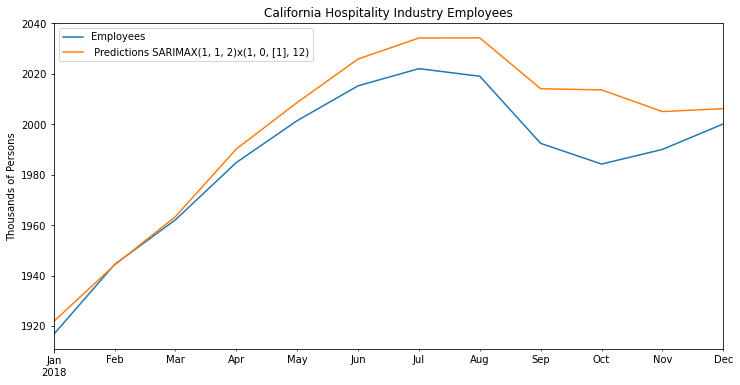

In [31]:
ax = test['Employees'].plot(legend=True, figsize=(12,6),title=title) #добавлем заголовок
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### 8. Оцените качество модели с помощью MSE и RMSE


In [32]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

mse_error = mean_squared_error(test['Employees'], predictions)
rmse_error = rmse(test['Employees'], predictions)

print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}') 
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}') 

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506622
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222845


In [16]:
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {error1:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {error2:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 182.8506622
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 13.52222845


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [17]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 16 Dec 2021   AIC                           2208.504
Time:                                      11:18:47   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.530      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.474      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.150      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    705.126      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.324      0.000      -0.834      -0.664
sigma2        29.2970      1.717     17.064      0.000      25.932      32.662
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) ')

### 10. Постройте график предсказаний и график исходных данных


<AxesSubplot:>

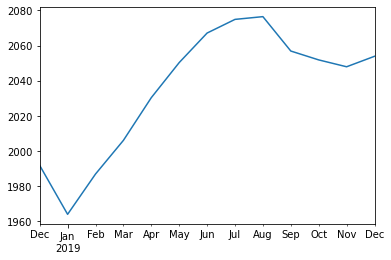

In [19]:
fcast.plot()
# df['Employees'][-1]

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

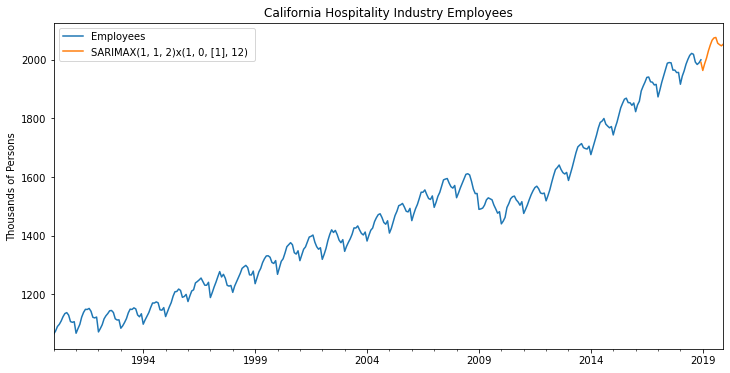

In [33]:
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons' 
xlabel = '' 


ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Бонус: воспользуйтесь библиотекой Prophet для предсказания на 1 год вперед